In [2]:
from lender_main import *

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2
pd.options.display.max_rows = 999

In [9]:
df = read_full_data()

In [10]:
df.shape

(2945384, 105)

In [11]:
df = create_lenders_labels(df)

In [12]:
df.shape

(2945384, 109)

In [13]:
normal = df[~df['dollar_outliers?']][~df['team_outliers?']][~df['comments_outliers?']][~df['dollar_zeros?']]

In [10]:
normal.shape

(1017355, 109)

In [11]:
ndf, X = feature_engineer(normal) #with loan preferences

In [4]:
from model import *

# with loan preference: pca + kmeans

In [13]:
re_pca, imp_f = PCA_reduce(X,3)

#0 Principle Component top 5 contributors are: [ 6  9 17 81  5]
#1 Principle Component top 5 contributors are: [28 10 18  6 23]
#2 Principle Component top 5 contributors are: [22  1  0 97 82]
Reduced X shape: (1017355, 3)
Explained variance: [9.90667789 8.40760622 4.23020321]
Explained variance ratio: [0.03095834 0.02627374 0.01321937]
Explained variance ratio accumulated: [0.03095834 0.05723208 0.07045145]


In [14]:
re_pca_df = pd.DataFrame(re_pca)

In [15]:
re_pca_df.to_csv('pca_3d_normal.csv',index=False)

In [5]:
import pandas as pd
re_pca_df = pd.read_csv('pca_3d_normal.csv')

In [6]:
re_pca = re_pca_df.values

In [14]:
counter = print_imp_features(ndf,imp_f)

Counter({'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL': 2, 'FIRST_YEAR_DEPOSIT_TOTAL': 1, 'FIRST_YEAR_DEPOSIT_OCCASION_NUM': 1, 'FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY_none': 1, 'LIFETIME_DEPOSIT_TOTAL': 1, 'NUM_DISTINCT_COUNTRIES_LENT_TO': 1, 'FIRST_YEAR_LOAN_PURCHASE_TOTAL': 1, 'FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM': 1, 'NUM_TEAM_LOANS': 1, 'NUM_TEAM_MEMBERSHIPS': 1, 'IS_CORPORATE_CAMPAIGN_USER': 1, 'ACCOUNT_AGE_MONTHS': 1, 'FIRST_BASKET_CATEGORY_Kiva Card Redeemer': 1, 'FIRST_TRANSACTION_REFERRAL_giftcard': 1})


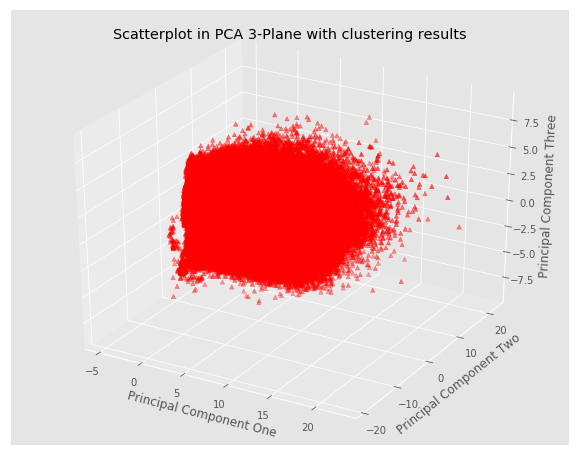

In [15]:
matplotlib_3D_X_reduced(re_pca)

In [7]:
y = kmeans_cluster(re_pca,5)

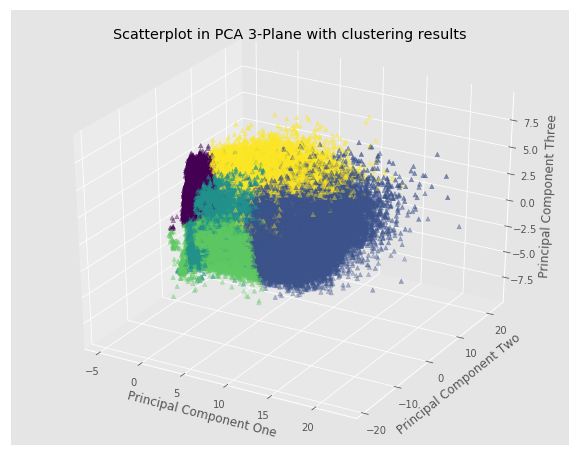

In [8]:
plot_3D_kmeans(re_pca,y) #5 clusters

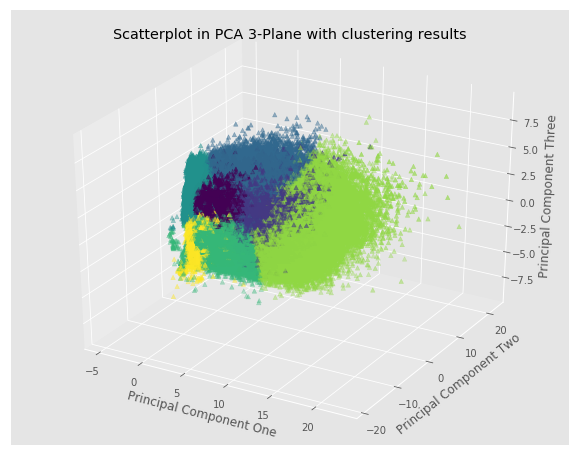

In [8]:
plot_3D_kmeans(re_pca,y) #7 clusters

In [9]:
# from sklearn.metrics import silhouette_samples, silhouette_score

In [11]:
re_pca.shape

(1017355, 3)

In [11]:
# subset_five_percent = pd.DataFrame(re_pca,index=y).sample(50867).reset_index().rename({'index':'y'},axis=1).values

In [ ]:
# silhouette_avg = silhouette_score(subset_five_percent[:,1:4], subset_five_percent[:,0])

In [8]:
y

array([2, 1, 2, ..., 3, 1, 1], dtype=int32)

In [14]:
normal.head()

,FUND_ACCOUNT_ID,LOGIN_ID,VINTAGE_YEAR,VINTAGE_MONTH,VINTAGE_DATE,FIRST_TRANSACTION_DATE,FIRST_DEPOSIT_DATE,LAST_TRANSACTION_DATE,LAST_LOGIN_DATE,ACTIVE_LIFETIME_MONTHS,...,NUM_BUNDLE_DISASTER_RECOVERY_LOANS,NUM_BUNDLE_INNOVATIVE_LOANS,NUM_BUNDLE_REFUGEE_LOANS,NUM_BUNDLE_SOCIAL_ENTERPRISE_LOANS,NUM_BUNDLE_CLEAN_ENERGY_LOANS,NUM_BUNDLE_SOLAR_LOANS,dollar_outliers?,team_outliers?,comments_outliers?,dollar_zeros?
1,620568,620568,2009,200912,2009-12-18 00:00:00.000 -0800,2016-06-30 00:00:00.000 -0700,2016-06-30 00:00:00.000 -0700,2018-02-12 00:00:00.000 -0800,2018-02-14 00:00:00.000 -0800,20.0,...,0,0,0,0,0,0,False,False,False,False
2,650821,650821,2010,201001,2010-01-10 00:00:00.000 -0800,2016-07-19 00:00:00.000 -0700,2016-07-19 00:00:00.000 -0700,2016-09-22 00:00:00.000 -0700,2016-09-22 00:00:00.000 -0700,2.0,...,0,0,0,0,0,0,False,False,False,False
3,309633,309633,2008,200806,2008-06-25 00:00:00.000 -0700,2016-07-11 00:00:00.000 -0700,2016-07-11 00:00:00.000 -0700,2018-04-23 00:00:00.000 -0700,2018-04-23 00:00:00.000 -0700,21.0,...,0,0,0,0,0,0,False,False,False,False
4,969173,969173,2011,201108,2011-08-03 00:00:00.000 -0700,2016-07-02 00:00:00.000 -0700,2016-07-02 00:00:00.000 -0700,2017-12-24 00:00:00.000 -0800,2018-01-01 00:00:00.000 -0800,17.0,...,0,0,0,0,0,0,False,False,False,False
5,53101,53101,2007,200704,2007-04-11 00:00:00.000 -0700,2016-12-10 00:00:00.000 -0800,2016-12-10 00:00:00.000 -0800,2018-03-02 00:00:00.000 -0800,2018-04-26 00:00:00.000 -0700,15.0,...,0,1,0,0,1,1,False,False,False,False


# Interpret cluster & radar plot

In [29]:
df = drop_columns(normal) #drop the columns we don't use 
df = convert_datetime(df)
df = convert_to_peroid(df)
df = create_donation_tip_col(df)
df = fill_cont_nans(df)
df = dummify(df)
# df = logify(df)
ndf = convert_cat_into_int(df)

In [30]:
ndf.shape

(1017355, 349)

In [31]:
ndf['cluster'] = y

In [32]:
ndf.head(20).T

,1,2,3,4,5,6,7,8,9,10,12,16,17,18,19,21,22,26,27,29
ACCOUNT_AGE_MONTHS,101,100,119,81,133,88,103,128,124,86,90,97,83,89,110,123,87,84,125,116
IS_CORPORATE_CAMPAIGN_USER,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
IS_FREE_TRIAL_USER,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
IS_INACTIVE_CREDIT_DONOR,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
LIFETIME_DONATION_TOTAL,0,7.5,11.25,3.75,30,3.75,0,3.75,35,1,33,0,0,0,3.75,33.75,40.89,0,3.75,24.61
LIFETIME_DEPOSIT_TOTAL,68.01,57.5,55.31,28.75,135.18,105.75,25,28.75,35,26,135.27,25,0,50,28.75,143.95,45,75,28.75,96.7
LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL,125,50,100,50,200,75,25,50,0.01,50,170,75,25,0.01,25,325,35,75,25,225
LIFETIME_PROXY_LOAN_PURCHASE_TOTAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM,17.6,24,21.5,15.5,19.875,16,21,21.5,14,18.5,16.4412,9.33333,6,14,6,19.3077,18.7143,18.3333,23,26.1111
FIRST_YEAR_DEPOSIT_TOTAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
cluster_mean = ndf.groupby(['cluster']).mean()

In [37]:
cluster_mean[['LIFETIME_DONATION_TOTAL',
       'LIFETIME_DEPOSIT_TOTAL', 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL']]

,LIFETIME_DONATION_TOTAL,LIFETIME_DEPOSIT_TOTAL,LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL
cluster,,,
0,0.294275,1.312679,144.845946
1,7.891865,32.736088,33.894641
2,12.038256,5.317368,61.487451
3,0.049195,0.197912,30.940385
4,15.941183,51.404003,207.360176


In [34]:
cluster_mean.columns

Index(['ACCOUNT_AGE_MONTHS', 'IS_CORPORATE_CAMPAIGN_USER',
       'IS_FREE_TRIAL_USER', 'IS_INACTIVE_CREDIT_DONOR',
       'LIFETIME_DONATION_TOTAL', 'LIFETIME_DEPOSIT_TOTAL',
       'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL',
       'LIFETIME_PROXY_LOAN_PURCHASE_TOTAL',
       'LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM',
       'FIRST_YEAR_DEPOSIT_TOTAL',
       ...
       'USER_LOCATION_COUNTRY_British Indian Ocean Territory',
       'USER_LOCATION_COUNTRY_nan', 'FIRST_LOAN_REGION_Asia',
       'FIRST_LOAN_REGION_Central America', 'FIRST_LOAN_REGION_Eastern Europe',
       'FIRST_LOAN_REGION_Middle East', 'FIRST_LOAN_REGION_North America',
       'FIRST_LOAN_REGION_Oceania', 'FIRST_LOAN_REGION_South America',
       'FIRST_LOAN_REGION_nan'],
      dtype='object', length=349)

In [61]:
test = cluster_mean.iloc[:,4:7]

In [49]:
# Libraries
from math import pi

In [62]:
test

,LIFETIME_DONATION_TOTAL,LIFETIME_DEPOSIT_TOTAL,LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL
cluster,,,
0,0.294275,1.312679,144.845946
1,7.891865,32.736088,33.894641
2,12.038256,5.317368,61.487451
3,0.049195,0.197912,30.940385
4,15.941183,51.404003,207.360176


In [63]:
# number of variable
categories=list(test)
N = len(categories)

In [64]:
categories

['LIFETIME_DONATION_TOTAL',
 'LIFETIME_DEPOSIT_TOTAL',
 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL']

In [71]:
def make_spider( row, title, color):
    # number of variable
    categories=list(test)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,3,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    #plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    #plt.ylim(0,40)

    # Ind1
    values=test.loc[row].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)
 

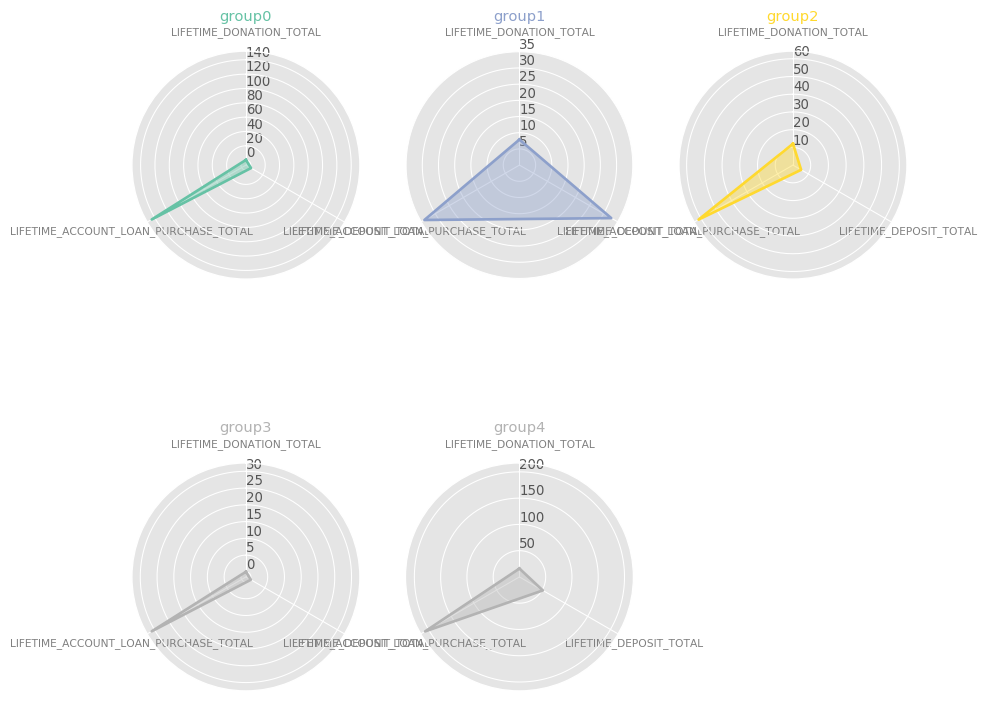

In [73]:
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(test.index)):
    make_spider(row=row, title='group{}'.format(row), color=my_palette(row))


## without loan preference

In [194]:
re_X, imp_t = PCA_reduce(X,3)

#0 Principle Component top 5 contributors are: [ 5 14  9 17 36]
#1 Principle Component top 5 contributors are: [ 32 303  15  10  18]
#2 Principle Component top 5 contributors are: [ 1  4 45 52 37]
Reduced X shape: (1017355, 3)
Explained variance: [9.10892193 4.6657714  3.84525684]
Explained variance ratio: [0.03312332 0.01696642 0.01398274]
Explained variance ratio accumulated: [0.03312332 0.05008974 0.06407248]


In [198]:
counter = print_imp_features(ls,imp_t)

Counter({'LIFETIME_DEPOSIT_TOTAL': 1, 'FIRST_DAY_DEPOSIT_TOTAL': 1, 'FIRST_YEAR_DEPOSIT_TOTAL': 1, 'FIRST_YEAR_DEPOSIT_OCCASION_NUM': 1, 'FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY_none': 1, 'last_login_today': 1, 'FIRST_LOAN_REGION_nan': 1, 'FIRST_DAY_LOAN_PURCHASE_TOTAL': 1, 'FIRST_YEAR_LOAN_PURCHASE_TOTAL': 1, 'FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM': 1, 'IS_CORPORATE_CAMPAIGN_USER': 1, 'LIFETIME_DONATION_TOTAL': 1, 'FIRST_TRANSACTION_REFERRAL_unknown': 1, 'FIRST_BASKET_CATEGORY_Kiva Card Redeemer': 1, 'FIRST_TRANSACTION_REFERRAL_giftcard': 1})


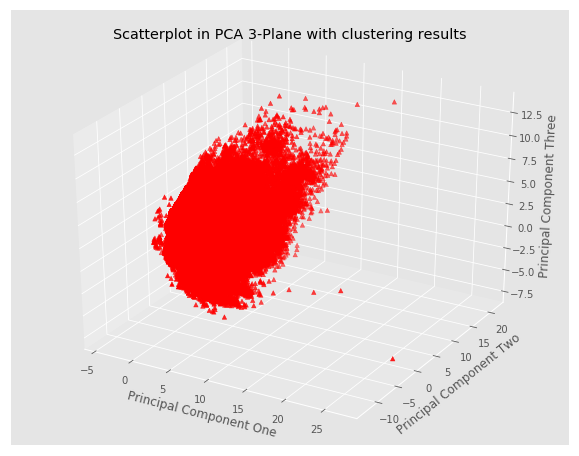

In [195]:
matplotlib_3D_X_reduced(re_X)

In [199]:
y, assigned_cluster = kmeans_cluster(re_X,10)

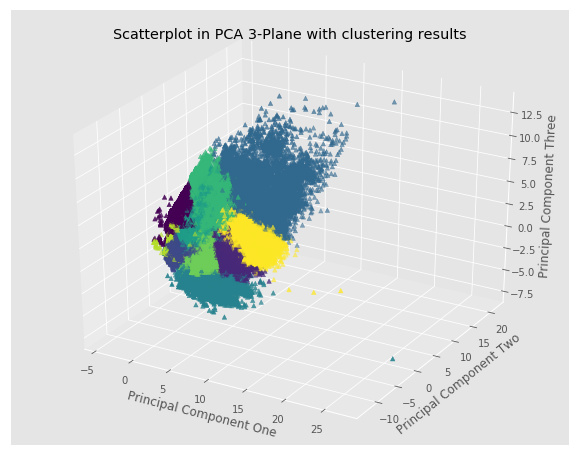

In [200]:
plot_3D_kmeans(re_X,y)

In [202]:
np.argmax(re_X[:,0])

188798

In [204]:
ls.iloc[188798,:]

ACCOUNT_AGE_MONTHS                                                      124
IS_CORPORATE_CAMPAIGN_USER                                                0
IS_FREE_TRIAL_USER                                                        0
IS_INACTIVE_CREDIT_DONOR                                              False
LIFETIME_DONATION_TOTAL                                                30.1
LIFETIME_DEPOSIT_TOTAL                                                 30.1
LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL                                   0.01
LIFETIME_PROXY_LOAN_PURCHASE_TOTAL                                        0
LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM                               14
FIRST_YEAR_DEPOSIT_TOTAL                                               23.2
FIRST_YEAR_LOAN_PURCHASE_TOTAL                                            0
FIRST_YEAR_DONATION_TOTAL                                                 0
FIRST_YEAR_EMAIL_REFERRAL_DONATION_TOTAL                                  0
FIRST_YEAR_E